In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("churn.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Count of Churn')

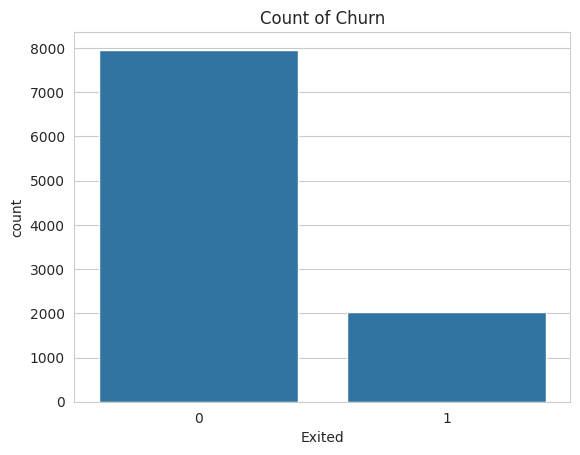

In [7]:
sns.countplot(x="Exited",data=df)
plt.title("Count of Churn")

Text(0.5, 1.0, 'Age Distribution')

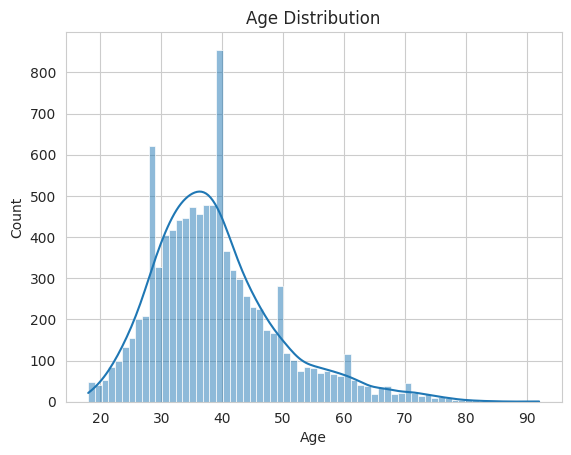

In [8]:
sns.histplot(df["Age"],kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'CreditScore vs Age')

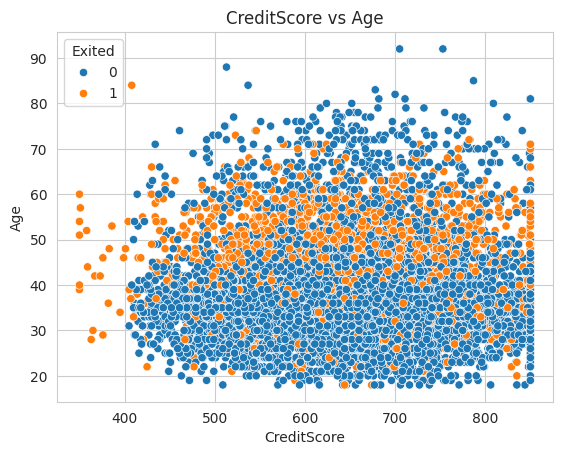

In [9]:
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("CreditScore vs Age")

Text(0.5, 1.0, 'Balance Distribution by Churn')

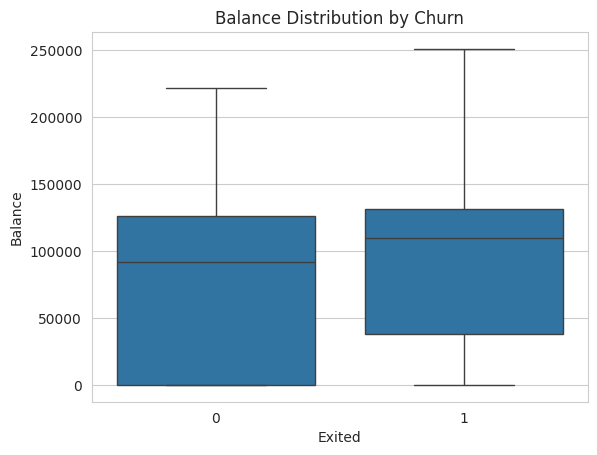

In [10]:
sns.boxplot(x="Exited",y="Balance",data=df)
plt.title("Balance Distribution by Churn")

Text(0.5, 1.0, 'CrediScore Distribution by Churn')

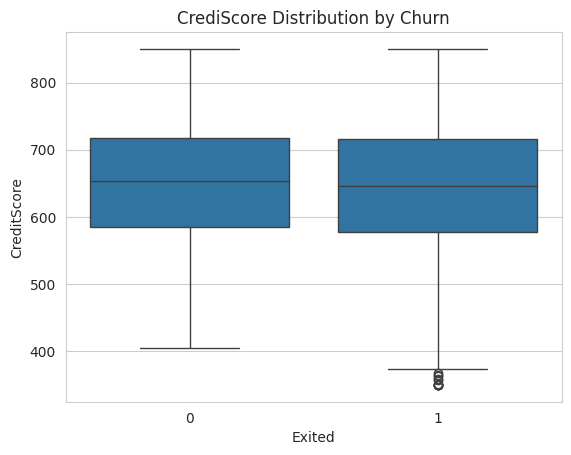

In [11]:
sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.title("CrediScore Distribution by Churn")


#### Drop the Exited column (We are trying to predict it)

In [12]:
features = df.drop("Exited",axis=1)

In [13]:
features

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
target = df["Exited"]

In [15]:
target

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


#### Drop columns that do not affect our model

In [16]:
features = features.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [17]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### Handle missing values

In [18]:
features = features.dropna()

In [19]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### Convert categorical data to numerical using
### One Hot Encoding -
 where categorical variables are converted to binary format with the new variable for each category value

In [20]:
features = pd.get_dummies(features, columns=["Geography","Gender"])

In [21]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


#### Separate Training and Testing data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# 80/20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [24]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True


#### Scaling our features - to ensure all the features contribute equally to the model

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train[0]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974,  1.00150113, -0.57946723,
       -0.57638802, -0.91324755,  0.91324755])

In [27]:
X_train[1]

array([-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
        0.64920267,  0.97481699,  1.6612541 , -0.99850112,  1.72572313,
       -0.57638802, -0.91324755,  0.91324755])

## Training our ML models

### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle # allows us to save our ml models

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [29]:
lr_model = LogisticRegression(random_state=42)

In [30]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [31]:
lr_predictions = lr_model.predict(X_test)

In [32]:
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [34]:
lr_accuracy

0.811

### XGBoost
#### Known to be one of the best models for tabular data. Builds models from tabular sequentially  and corrects the errors of previous models

### Function to evaluate the models and save them
* Train the Ml models
* Make the predictions
* Print the accuracy report for each model
* Also save the model to a file

In [35]:
def evaluate_and_save(model, X_train, y_train, X_test, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("------------------------------------")

  # wb opens the file in binary mode
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved to {filename}")

In [36]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save(xgb_model, X_train, y_train, X_test, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save(dt_model, X_train, y_train, X_test, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save(rf_model, X_train, y_train, X_test, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save(nb_model, X_train, y_train, X_test, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save(knn_model, X_train, y_train, X_test, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save(svm_model, X_train, y_train, X_test, y_test, "svm_model.pkl")

XGBClassifier Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------------
Model saved to xgb_model.pkl
DecisionTreeClassifier Accuracy: 0.7805

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

------------------------------------
Model saved to dt_model.pkl
RandomForestClassifier Accuracy: 0.8635

Classification Report:
              precision    recal

#### Accuracy is not always the best way to measure a model
* Precision - the ratio of true positive predictions to the total number of positive predictions
* Recall - a ratio of true positive predictions to the total number of actual posivces(churners)
* F1 Score - harmonic Mean of Precisiona dn Recall. A single scorfe that balances both of the metrics. Useful when you have uneven data as it takes both posive and negative


In [38]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [39]:
feature_importances

array([0.03500515, 0.10955004, 0.03005428, 0.05278617, 0.32388842,
       0.03194036, 0.16414644, 0.03265523, 0.04646328, 0.09137332,
       0.0368547 , 0.04528258, 0.        ], dtype=float32)

In [40]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [41]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
    })

In [42]:
feature_importances_df

,feature,importance
0,CreditScore,0.035005
1,Age,0.109550
2,Tenure,0.030054
3,Balance,0.052786
4,NumOfProducts,0.323888
5,HasCrCard,0.031940
6,IsActiveMember,0.164146
7,EstimatedSalary,0.032655
8,Geography_France,0.046463
9,Geography_Germany,0.091373


In [43]:
feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

In [44]:
feature_importances_df

,feature,importance
4,NumOfProducts,0.323888
6,IsActiveMember,0.164146
1,Age,0.109550
9,Geography_Germany,0.091373
3,Balance,0.052786
8,Geography_France,0.046463
11,Gender_Female,0.045283
10,Geography_Spain,0.036855
0,CreditScore,0.035005
7,EstimatedSalary,0.032655


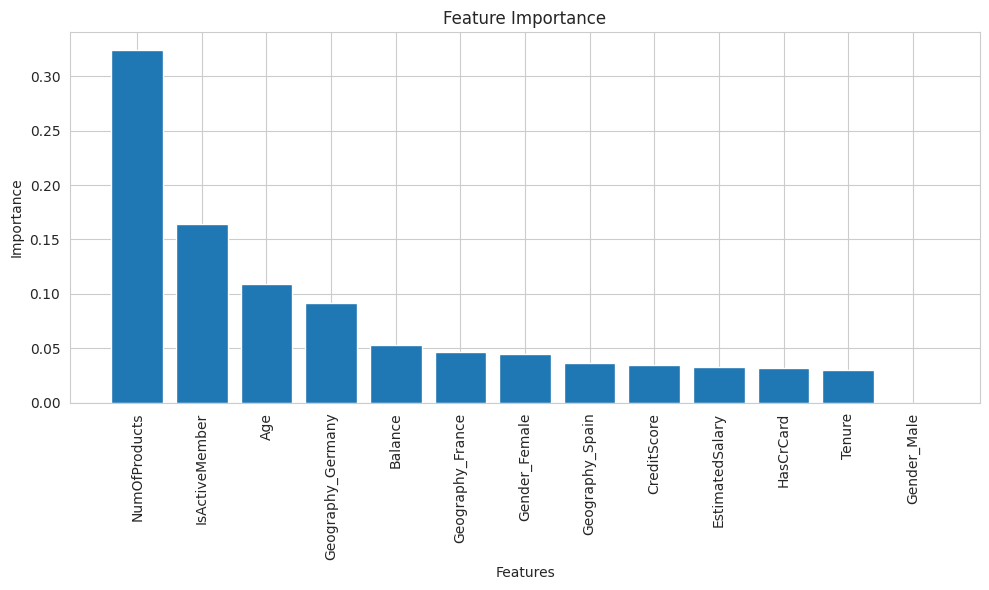

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
# sns.barplot(x='importance', y='feature', data=feature_importances_df)
# plt.title('Feature Importance')
# plt.show()

## Ways to Improve Model Accuracy

### Feature Engineering -
#### Creating new features from the existing ones to help the model learn better. We can do this by combining the existing features in different ways or by creating new features that are a function of the existing ones

In [46]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


In [47]:
features["CLV"] = df["Balance"] * df["EstimatedSalary"] / 1000000

In [48]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9431.952789
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,18190.405611
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9925.910240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5834.476142
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6973.634434


In [49]:
features["Age_Group"] = pd.cut(features["Age"], bins=[0, 30, 45, 60, 100], labels=["Young", "MiddleAge", "Senior", "Elderly"])

In [50]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,Age_Group
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9431.952789,MiddleAge
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,18190.405611,MiddleAge
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9925.910240,MiddleAge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5834.476142,MiddleAge
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6973.634434,MiddleAge


In [51]:
# Tenure-age  ratio
features["TenureAgeRatio"] = features["Tenure"] / features["Age"]

In [52]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,Age_Group,TenureAgeRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9431.952789,MiddleAge,0.024390
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,18190.405611,MiddleAge,0.190476
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9925.910240,MiddleAge,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5834.476142,MiddleAge,0.285714
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6973.634434,MiddleAge,0.071429


In [53]:
# Handle categorical variables
features = pd.get_dummies(features, drop_first=True)

In [54]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,Age_Group_MiddleAge,Age_Group_Senior,Age_Group_Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,0.047619,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,9431.952789,0.024390,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,18190.405611,0.190476,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,0.025641,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,9925.910240,0.046512,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,0.128205,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,5834.476142,0.285714,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,0.194444,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,6973.634434,0.071429,True,False,False


#### Split the data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [56]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,TenureAgeRatio,Age_Group_MiddleAge,Age_Group_Senior,Age_Group_Elderly
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True,0.000000,0.187500,True,False,False
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True,23443.892736,0.095238,True,False,False
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True,9855.128764,0.125000,False,False,False
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False,20763.366215,0.333333,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True,5613.119058,0.160714,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True,4836.743100,0.148148,False,True,False
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False,0.000000,0.017241,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False,0.000000,0.026316,True,False,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True,18548.706779,0.186047,True,False,False


In [57]:
xgboost_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save(xgboost_model, X_train, y_train, X_test, y_test, "xgboost_featureEngineered.pkl")

XGBClassifier Accuracy: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.50      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.85      2000

------------------------------------
Model saved to xgboost_featureEngineered.pkl


### SMOTE (Synthetic Minority Over-sampling Technique)
#### THis involves creating new sythetic data for the minority class in the dataset( in this case customers who are going to churn) to help the model learn better. It's a process of creating new sythetic data for the minority class by selecting the most importance features to use in the model. THis process is repeated until the minority class is balanced by the majority class

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE(random_state=42)

In [60]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [61]:
evaluate_and_save(xgb_model, X_resampled, y_resampled, X_test, y_test, "xgboost_SMOTE.pkl")

XGBClassifier Accuracy: 0.8580

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

------------------------------------
Model saved to xgboost_SMOTE.pkl


### Ensembling
#### This is like asking multiple experts for their opinion and the taking a mojority vote. It's a process of combining the predictions of multiple models tto create a new model that is better than the individual models. This helps us get the best of multiple models in order to get more accurate predictions.

In [62]:
from sklearn.ensemble import VotingClassifier

In [63]:
voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state=42, probability=True))],
    voting='hard'
)

In [65]:
evaluate_and_save(voting_clf, X_resampled, y_resampled, X_test, y_test, "voting_classifier.pkl")

VotingClassifier Accuracy: 0.8605

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.59      0.62       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000

------------------------------------
Model saved to voting_classifier.pkl


### Hyperparameter tuning